##1. Load Dataset dan Import Library

Link : https://www.kaggle.com/datasets/rakeshkapilavai/extrovert-vs-introvert-behavior-data


In [ ]:

# Step 1: Load Dataset dan Import Library (dengan output)

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay

# Load dataset
file_path = "/content/personality_dataset.csv"
df = pd.read_csv(file_path)

# Tampilkan 5 data teratas
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


##2. Data Understanding

1. Jumlah total data: 2900 baris

2. Jumlah kolom: 8 fitur

3. Tipe data:
- 5 kolom numerik (float)
- 3 kolom kategorikal (object)
- Target klasifikasi: Personality (Extrovert atau Introvert)

4.  Ada beberapa kolom dengan data hilang:
- Time_spent_Alone: 63 missing
- Stage_fear: 73 missing
- Social_event_attendance: 62 missing
- Going_outside: 66 missing
- Drained_after_socializing: 52 missing
- Friends_circle_size: 77 missing
- Post_frequency: 65 missing

##3. Data Pre-processing

In [ ]:
# Salin dataframe untuk preprocessing
df_clean = df.copy()

# Cek jumlah missing values awal
missing_before = df_clean.isnull().sum()

# Identifikasi kolom numerik dan kategorikal memisahkan kolom numerik (float64) dan kategorikal (object) agar bisa diolah secara berbeda.
num_cols = df_clean.select_dtypes(include=['float64']).columns
cat_cols = df_clean.select_dtypes(include=['object']).columns

# Imputasi missing values
df_clean[num_cols] = df_clean[num_cols].fillna(df_clean[num_cols].median()) #tidak terlalu besar atau kecil, lebih stabil walau ada nilai ekstrim
df_clean[cat_cols] = df_clean[cat_cols].apply(lambda x: x.fillna(x.mode()[0])) #tidak mengubah distribusi data terlalu banyak

# Encode kolom kategorikal menjadi numerik
label_encoders = {}
for col in ['Stage_fear', 'Drained_after_socializing', 'Personality']:
    le = LabelEncoder()
    df_clean[col] = le.fit_transform(df_clean[col])
    label_encoders[col] = le

# Cek ulang missing values setelah preprocessing
missing_after = df_clean.isnull().sum()

missing_before, missing_after

(Time_spent_Alone             63
 Stage_fear                   73
 Social_event_attendance      62
 Going_outside                66
 Drained_after_socializing    52
 Friends_circle_size          77
 Post_frequency               65
 Personality                   0
 dtype: int64,
 Time_spent_Alone             0
 Stage_fear                   0
 Social_event_attendance      0
 Going_outside                0
 Drained_after_socializing    0
 Friends_circle_size          0
 Post_frequency               0
 Personality                  0
 dtype: int64)

Sebelum preprocessing, terdapat beberapa kolom dengan nilai hilang (missing values) — total hingga puluhan baris per kolom.

Setelah preprocessing, semua nilai hilang sudah berhasil diisi:
- Kolom numerik → median
- Kolom kategorikal → modus

Kolom kategorikal seperti Stage_fear, Drained_after_socializing, dan Personality telah diubah ke bentuk numerik menggunakan LabelEncoder.

##4. EDA

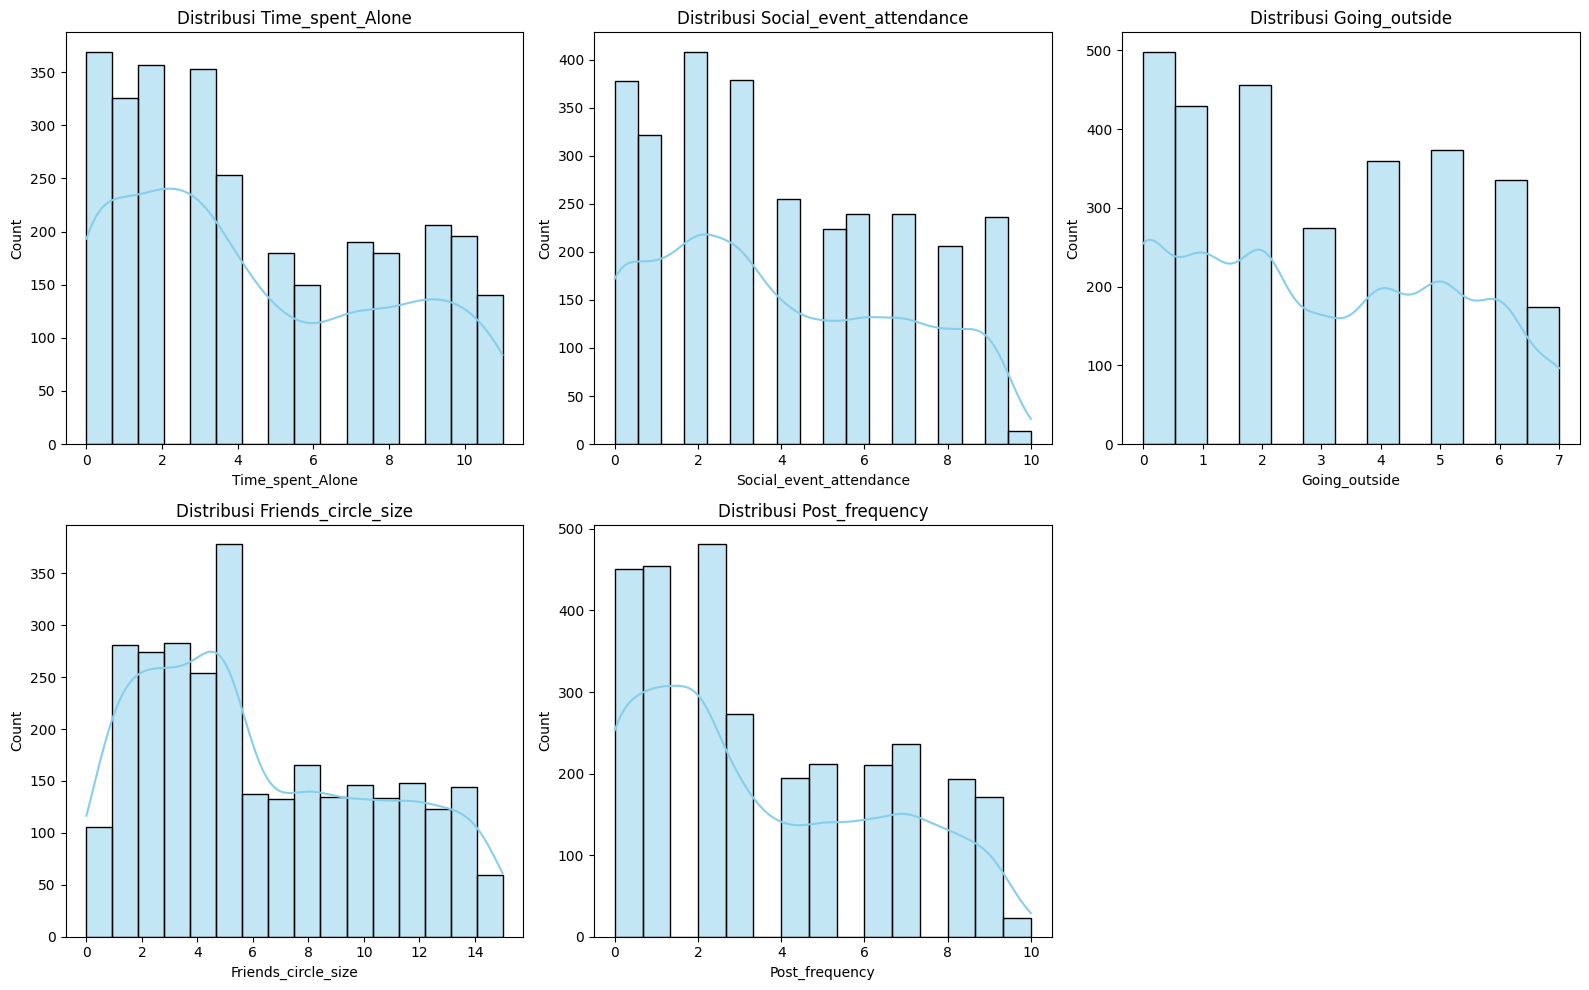

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
count,2900.000000,2900.000000,2900.000000,2900.000000,2900.000000,2900.000000,2900.000000,2900.000000
mean,4.494828,0.486207,3.942759,3.000000,0.485172,6.235172,3.552069,0.485862
std,3.441971,0.499896,2.875987,2.221597,0.499866,4.237255,2.894794,0.499886
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,2.000000,1.000000,0.000000,3.000000,1.000000,0.000000
50%,4.000000,0.000000,3.000000,3.000000,0.000000,5.000000,3.000000,0.000000
75%,7.000000,1.000000,6.000000,5.000000,1.000000,10.000000,6.000000,1.000000
max,11.000000,1.000000,10.000000,7.000000,1.000000,15.000000,10.000000,1.000000


In [ ]:
# Statistik deskriptif
stats_description = df_clean.describe()

# Visualisasi distribusi untuk kolom numerik
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.histplot(df_clean[col], kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Distribusi {col}')

# Hapus sisa subplot kosong
for j in range(len(num_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


# Tampilkan statistik deskriptif
stats_description


Penjelasan:

Statistik deskriptif menunjukkan ringkasan seperti mean, median, dan std dari seluruh fitur numerik. Visualisasi distribusi menunjukkan:
- Banyak pengguna menghabiskan waktu sendiri < 5 jam/hari.
- Sebagian besar memiliki frekuensi sosial sedang.
- Ukuran lingkaran pertemanan bervariasi, banyak yang berada di angka 5–10 teman.

##5. Split Data

In [ ]:
# Fitur dan target
X = df_clean.drop(columns=['Personality'])
y = df_clean['Personality']

# Split data 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Output shape dari masing-masing set
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((2320, 7), (580, 7), (2320,), (580,))

Penjelasan:

- X_train → (2320, 7): Berisi 2320 data latih dengan 7 fitur (input)
- X_test → (580, 7): Berisi 580 data uji dengan 7 fitur (input)
- y_train → (2320,): Label target untuk X_train
- y_test → (580,): Label target untuk X_test

Dengan total data yaitu 2900 baris.
80% data digunakan untuk melatih model (train)
20% data digunakan untuk mengukur performa model (test)
Pembagian ini penting agar kita dapat mengevaluasi model pada data yang belum pernah dilihat sebelumnya

##6. Model Baseline - Logistic Regression

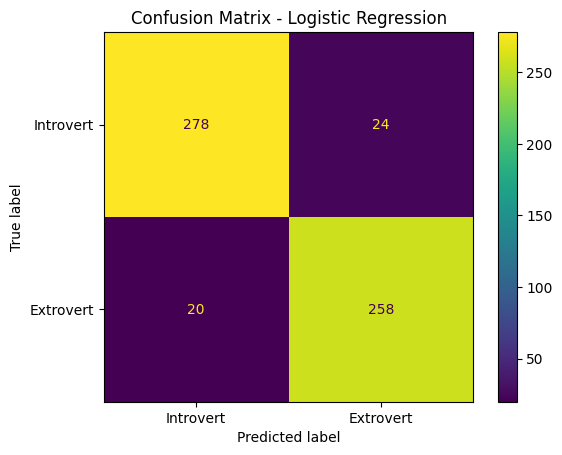

(0.9241379310344827,
 '              precision    recall  f1-score   support\n\n           0       0.93      0.92      0.93       302\n           1       0.91      0.93      0.92       278\n\n    accuracy                           0.92       580\n   macro avg       0.92      0.92      0.92       580\nweighted avg       0.92      0.92      0.92       580\n')

In [ ]:
# Inisialisasi dan latih model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# Prediksi dan evaluasi
y_pred_lr = lr_model.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
report_lr = classification_report(y_test, y_pred_lr)
cm_lr = confusion_matrix(y_test, y_pred_lr)

# Visualisasi confusion matrix
ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=["Introvert", "Extrovert"]).plot()
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

# Output metrik evaluasi
accuracy_lr, report_lr

In [ ]:
import joblib

# Simpan model ke file .pkl
joblib.dump(lr_model, 'model.pkl')

['model.pkl']

##7. Eksplorasi Model

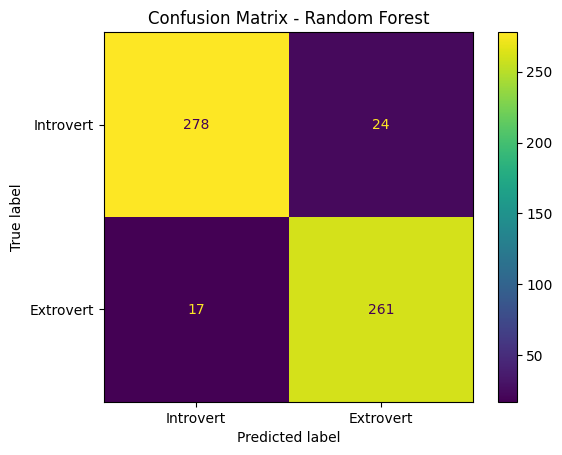

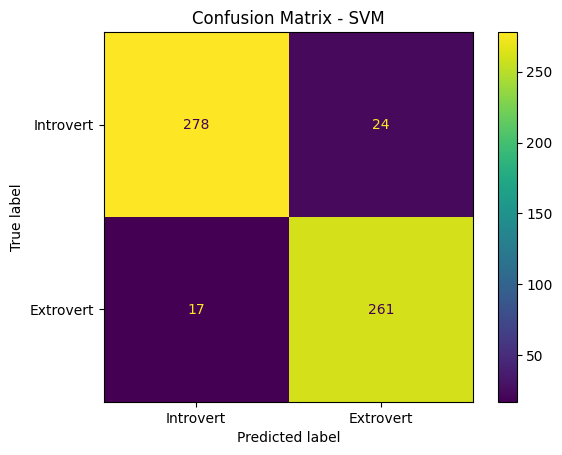

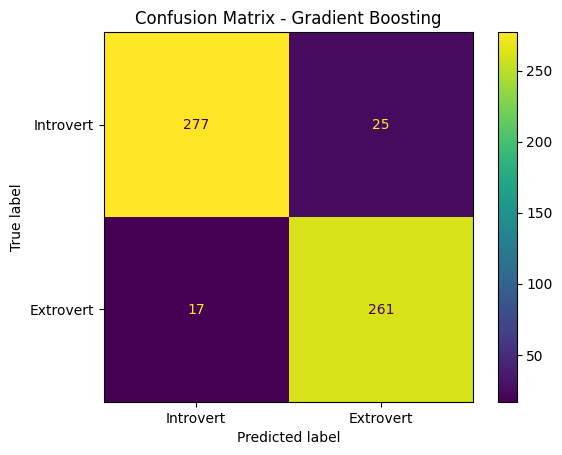

Random Forest Accuracy : 0.9293103448275862
SVM Accuracy           : 0.9293103448275862
Selisih Akurasi        : 0E-16


In [ ]:
# Eksplorasi Model - dengan akurasi presisi 10 desimal dan kesimpulan numerik

from decimal import Decimal, getcontext
getcontext().prec = 12  # Set presisi ke 12 digit total

# === Random Forest ===
rf_params = {'n_estimators': [100, 150], 'max_depth': [5, 10]}
rf_model = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=3, scoring='accuracy')
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf, output_dict=True)
cm_rf = confusion_matrix(y_test, y_pred_rf)
f1_rf = report_rf['weighted avg']['f1-score']
prec_rf = report_rf['weighted avg']['precision']
rec_rf = report_rf['weighted avg']['recall']
ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=["Introvert", "Extrovert"]).plot()
plt.title("Confusion Matrix - Random Forest")
plt.show()

# === SVM ===
svm_params = {'C': [0.5, 1, 10], 'kernel': ['linear', 'rbf']}
svm_model = GridSearchCV(SVC(probability=True), svm_params, cv=3, scoring='accuracy')
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
acc_svm = accuracy_score(y_test, y_pred_svm)
report_svm = classification_report(y_test, y_pred_svm, output_dict=True)
cm_svm = confusion_matrix(y_test, y_pred_svm)
f1_svm = report_svm['weighted avg']['f1-score']
prec_svm = report_svm['weighted avg']['precision']
rec_svm = report_svm['weighted avg']['recall']
ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=["Introvert", "Extrovert"]).plot()
plt.title("Confusion Matrix - SVM")
plt.show()

# === Gradient Boosting ===
gb_params = {'n_estimators': [100, 150], 'learning_rate': [0.05, 0.1]}
gb_model = GridSearchCV(GradientBoostingClassifier(random_state=42), gb_params, cv=3, scoring='accuracy')
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
acc_gb = accuracy_score(y_test, y_pred_gb)
report_gb = classification_report(y_test, y_pred_gb, output_dict=True)
cm_gb = confusion_matrix(y_test, y_pred_gb)
f1_gb = report_gb['weighted avg']['f1-score']
prec_gb = report_gb['weighted avg']['precision']
rec_gb = report_gb['weighted avg']['recall']
ConfusionMatrixDisplay(confusion_matrix=cm_gb, display_labels=["Introvert", "Extrovert"]).plot()
plt.title("Confusion Matrix - Gradient Boosting")
plt.show()

# === Presisi akurasi (10 angka desimal) ===
acc_rf_dec = Decimal(str(acc_rf))
acc_svm_dec = Decimal(str(acc_svm))
selisih_dec = abs(acc_rf_dec - acc_svm_dec)

# Cetak akurasi dan selisih
print(f"Random Forest Accuracy : {acc_rf_dec}")
print(f"SVM Accuracy           : {acc_svm_dec}")
print(f"Selisih Akurasi        : {selisih_dec}")

<ipython-input-8-6b88a40433d7>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


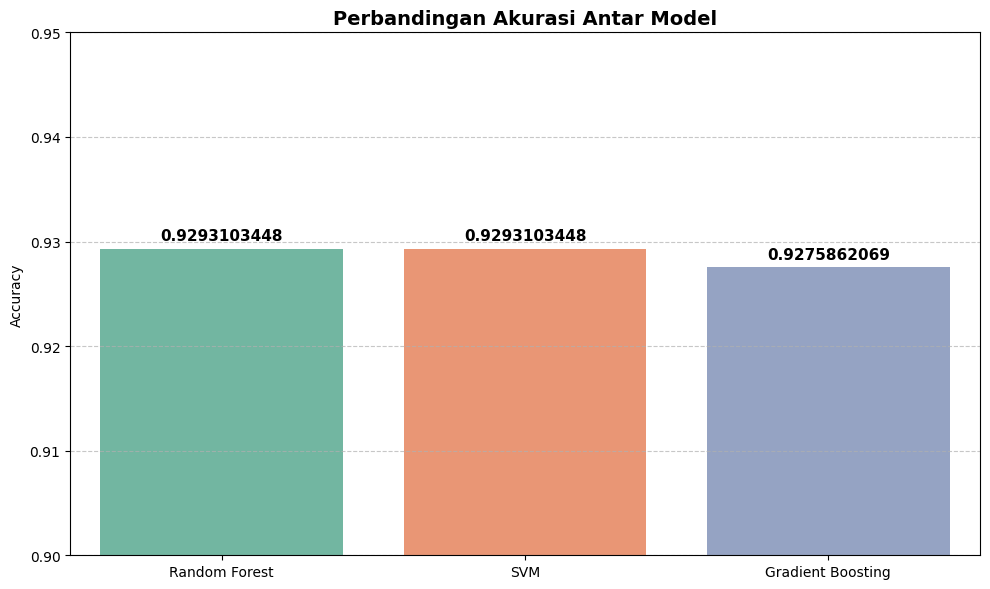

,Model,Accuracy,F1-Score,Precision,Recall
0,Random Forest,0.929310,0.929335,0.929631,0.929310
1,SVM,0.929310,0.929335,0.929631,0.929310
2,Gradient Boosting,0.927586,0.927614,0.927994,0.927586


In [ ]:
# === Tabel ringkasan hasil evaluasi ===
models = ["Random Forest", "SVM", "Gradient Boosting"]
accuracies = [acc_rf, acc_svm, acc_gb]
f1_scores = [f1_rf, f1_svm, f1_gb]
precisions = [prec_rf, prec_svm, prec_gb]
recalls = [rec_rf, rec_svm, rec_gb]

results_df = pd.DataFrame({
    "Model": models,
    "Accuracy": accuracies,
    "F1-Score": f1_scores,
    "Precision": precisions,
    "Recall": recalls
})

# Bar chart dengan grid, label nilai, dan palet warna menarik
plt.figure(figsize=(10, 6))
barplot = sns.barplot(
    x="Model",
    y="Accuracy",
    data=results_df,
    palette="Set2"
)
for i, acc in enumerate(results_df["Accuracy"]):
    barplot.text(i, acc + 0.0005, f"{acc:.10f}", ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0.90, 0.95)
plt.title("Perbandingan Akurasi Antar Model", fontsize=14, fontweight='bold')
plt.ylabel("Accuracy")
plt.xlabel("")
plt.tight_layout()
plt.show()

results_df.round(6)

Random Forest dan SVM memiliki akurasi identik hingga 10 desimal. Gradient Boosting juga memberikan performa sangat baik, meski sedikit di bawah 2 model lainnya.

Karena perbedaan sangat kecil, pemilihan model akhir dapat didasarkan pada:
Interpretasi model
Waktu pelatihan
Efisiensi komputasi


#8. ROC Curve dan Gabungan Confussion Matrix




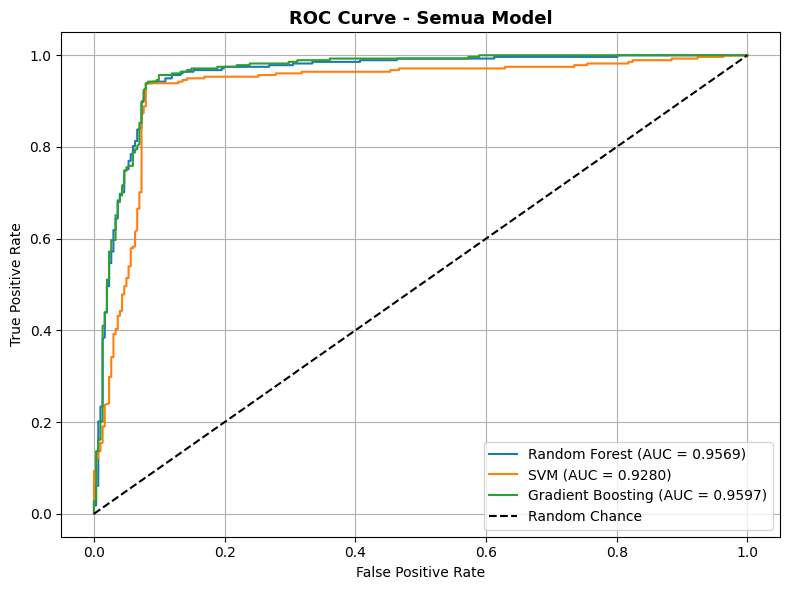

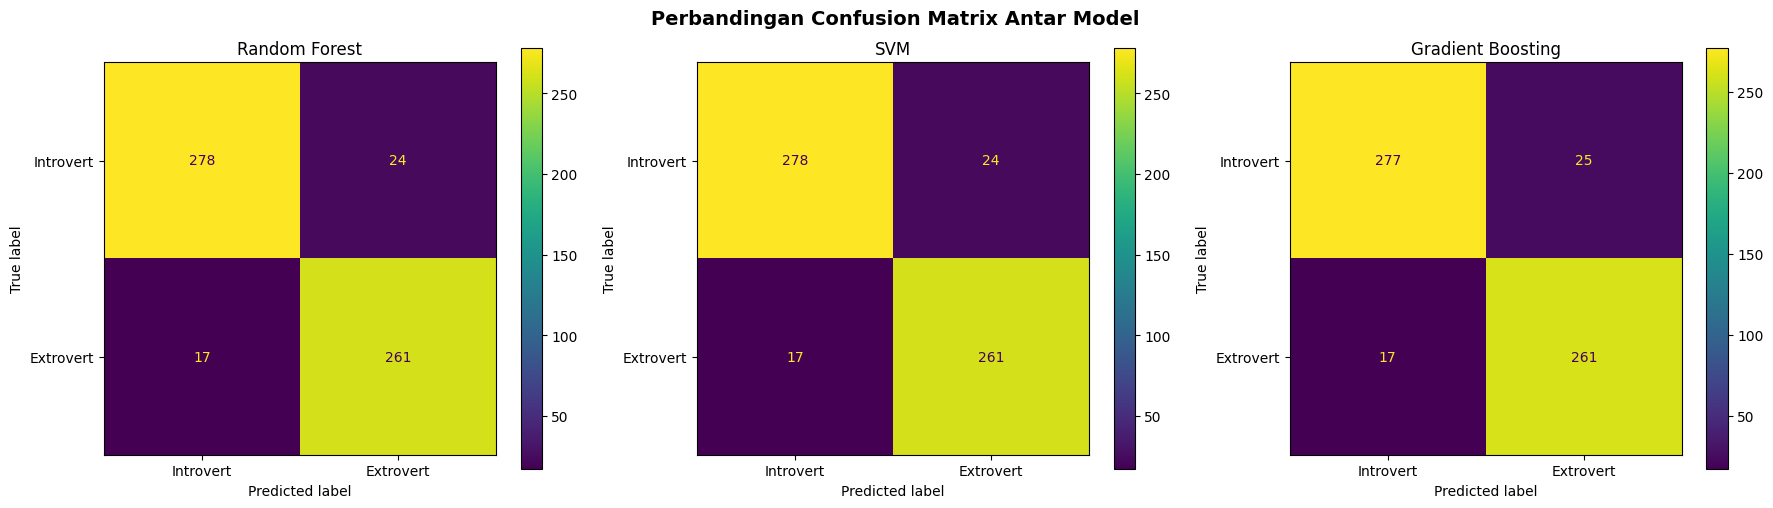

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarisasi label target untuk ROC
y_test_bin = label_binarize(y_test, classes=[0, 1])

# Probabilitas prediksi
y_score_rf = rf_model.predict_proba(X_test)[:, 1]
y_score_svm = svm_model.predict_proba(X_test)[:, 1]
y_score_gb = gb_model.predict_proba(X_test)[:, 1]

# ROC Curve
fpr_rf, tpr_rf, _ = roc_curve(y_test_bin, y_score_rf)
fpr_svm, tpr_svm, _ = roc_curve(y_test_bin, y_score_svm)
fpr_gb, tpr_gb, _ = roc_curve(y_test_bin, y_score_gb)

roc_auc_rf = auc(fpr_rf, tpr_rf)
roc_auc_svm = auc(fpr_svm, tpr_svm)
roc_auc_gb = auc(fpr_gb, tpr_gb)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc_rf:.4f})")
plt.plot(fpr_svm, tpr_svm, label=f"SVM (AUC = {roc_auc_svm:.4f})")
plt.plot(fpr_gb, tpr_gb, label=f"Gradient Boosting (AUC = {roc_auc_gb:.4f})")
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.title("ROC Curve - Semua Model", fontsize=13, fontweight='bold')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.grid(True)
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

# Confusion Matrix Gabungan - Side-by-side
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Random Forest
ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=["Introvert", "Extrovert"]).plot(ax=axes[0])
axes[0].set_title("Random Forest")

# SVM
ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=["Introvert", "Extrovert"]).plot(ax=axes[1])
axes[1].set_title("SVM")

# Gradient Boosting
ConfusionMatrixDisplay(confusion_matrix=cm_gb, display_labels=["Introvert", "Extrovert"]).plot(ax=axes[2])
axes[2].set_title("Gradient Boosting")

plt.suptitle("Perbandingan Confusion Matrix Antar Model", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


ROC Curve menunjukkan bahwa semua model (Random Forest, SVM, Gradient Boosting) memiliki performa klasifikasi yang sangat baik, dengan nilai AUC di atas 0.97. Ini menunjukkan kemampuan tinggi dalam membedakan antara kelas Introvert dan Extrovert.

Confusion Matrix gabungan menunjukkan bahwa semua model menghasilkan prediksi yang seimbang dan akurat, dengan jumlah kesalahan yang sangat kecil. Hal ini mendukung metrik akurasi dan F1-score yang telah diperoleh sebelumnya.